In [1]:
import urllib.request

urllib.request.urlretrieve(
'https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv',
    'italy-covid-daywise.csv'
)

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0xe7c623a108>)

In [2]:
import pandas as pd

In [3]:
covid_df=pd.read_csv('italy-covid-daywise.csv')

In [10]:
print(covid_df)

           date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]


In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
date          248 non-null object
new_cases     248 non-null float64
new_deaths    248 non-null float64
new_tests     135 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [11]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [12]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [13]:
# best practice to do
covid_df.new_casesses

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [14]:
covid_df.at[246,'new_cases']

975.0

In [19]:
new_df=covid_df[['date','new_cases','new_deaths']]
new_df

,date,new_cases,new_deaths
0,2019-12-31,0.0,0.0
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
...,...,...,...
243,2020-08-30,1444.0,1.0
244,2020-08-31,1365.0,4.0
245,2020-09-01,996.0,6.0
246,2020-09-02,975.0,8.0


In [21]:
covid_df.loc[247]

date          2020-09-03
new_cases           1326
new_deaths             6
new_tests            NaN
Name: 247, dtype: object

In [22]:
covid_df.tail(10)

,date,new_cases,new_deaths,new_tests
238,2020-08-25,953.0,4.0,45798.0
239,2020-08-26,876.0,4.0,58054.0
240,2020-08-27,1366.0,13.0,57640.0
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [27]:
covid_df.new_tests.first_valid_index()

111

In [29]:
covid_df.loc[109:115]

,date,new_cases,new_deaths,new_tests
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
115,2020-04-24,2646.0,464.0,95273.0


# Total Number of reported cases and total deaths??

In [37]:
total_cases=covid_df.new_cases.sum()
total_deaths=covid_df.new_deaths.sum()

# death rate?

In [41]:
death_rate= (total_deaths/total_cases)

0.13073679170579894


# what is the total number of overall tests conducted? a total 935310 tests were conducted before being reported

In [48]:
initial_test=935310
total_tests=(covid_df.new_tests.sum()) + initial_test
print(total_tests)

5214766.0


# positivity rate??

In [53]:
positive_rate=(total_cases/total_tests)
print(positive_rate)

0.05206657403227681


# querying and sorting of the data

In [52]:
high_new_cases=covid_df.new_cases>1000
print(high_new_cases)

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool


In [55]:
high_ratio_df=covid_df[covid_df.new_cases/covid_df.new_tests >positive_rate]
print(high_ratio_df)

           date  new_cases  new_deaths  new_tests
111  2020-04-20     3047.0       433.0     7841.0
112  2020-04-21     2256.0       454.0    28095.0
113  2020-04-22     2729.0       534.0    44248.0
114  2020-04-23     3370.0       437.0    37083.0
116  2020-04-25     3021.0       420.0    38676.0
117  2020-04-26     2357.0       415.0    24113.0
118  2020-04-27     2324.0       260.0    26678.0
120  2020-04-29     2091.0       382.0    38589.0
123  2020-05-02     1965.0       269.0    31231.0
124  2020-05-03     1900.0       474.0    27047.0
125  2020-05-04     1389.0       174.0    22999.0
128  2020-05-07     1444.0       369.0    13665.0


In [56]:
covid_df['positive_rate']=covid_df.new_cases/covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [59]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [61]:
covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [62]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [68]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [69]:
covid_df.loc[165:175]

,date,new_cases,new_deaths,new_tests
165,2020-06-13,163.0,56.0,32880.0
166,2020-06-14,346.0,78.0,29545.0
167,2020-06-15,338.0,44.0,17463.0
168,2020-06-16,301.0,26.0,27762.0
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0


In [71]:
covid_df.at[172,'new_cases']=(covid_df.at[171,'new_cases'] + 
                              covid_df.at[173,'new_cases'])/2
covid_df.loc[168:176]

,date,new_cases,new_deaths,new_tests
168,2020-06-16,301.0,26.0,27762.0
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0
176,2020-06-24,113.0,18.0,30237.0


In [72]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [4]:
covid_df['date']=pd.to_datetime(covid_df.date)
print(covid_df.date)

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]


In [5]:
covid_df['year']=pd.DatetimeIndex(covid_df.date).year
covid_df['month']=pd.DatetimeIndex(covid_df.date).month
covid_df['day']=pd.DatetimeIndex(covid_df.date).day
covid_df['weekday']=pd.DatetimeIndex(covid_df.date).weekday
print(covid_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5
..         ...        ...         ...        ...   ...    ...  ...      ...
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3

[248 rows x 8 columns]


#             Practice

In [79]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [90]:
covid_df_jan=covid_df[covid_df.month==1]
covid_df_jan_total=covid_df_jan[['new_cases','new_deaths','new_tests']].sum()
covid_df_jan_total

new_cases     3.0
new_deaths    0.0
new_tests     0.0
dtype: float64

In [91]:
covid_df_feb=covid_df[covid_df.month==2]
covid_df_feb_total=covid_df_feb[['new_cases','new_deaths','new_tests']].sum()
covid_df_feb_total

new_cases     885.0
new_deaths     21.0
new_tests       0.0
dtype: float64

In [92]:
covid_df_mar=covid_df[covid_df.month==3]
covid_df_mar_total=covid_df_mar[['new_cases','new_deaths','new_tests']].sum()
covid_df_mar_total

new_cases     100851.0
new_deaths     11570.0
new_tests          0.0
dtype: float64

In [93]:
covid_df_may=covid_df[covid_df.month==5]
covid_df_may_total=covid_df_may[['new_cases','new_deaths','new_tests']].sum()
covid_df_may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [118]:
covid_df_new_cases_mean=covid_df.new_cases.mean()
covid_df_new_cases_mean

1096.6149193548388

In [116]:
covid_df_sunday=covid_df[covid_df.weekday==6]
covid_df_sunday_mean=covid_df_sunday.new_cases.mean()
covid_df_sunday_mean

1247.2571428571428

In [120]:
if covid_df_new_cases_mean<covid_df_sunday_mean:
    print('sunday has got higher rate of new cases hence implement the lockdown')
else:
    print('ghabrana nai ha')

sunday has got higher rate of new cases hence implement the lockdown


# Grouping

In [8]:
covid_df_monthly_group=covid_df.groupby('month')[['new_cases','new_deaths','new_tests']]


In [9]:
covid_df_monthly_group.sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [11]:
covid_df_weekdays_groups=covid_df.groupby('weekday')[['new_cases','new_deaths','new_tests']]

In [14]:
covid_df_weekdays_groups.mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1185.800000,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [21]:
covid_df['Total_cases']=covid_df.new_cases.cumsum()
covid_df['Total_deaths']=covid_df.new_deaths.cumsum()
covid_df['Total_tests']=covid_df.new_tests.cumsum()

In [22]:
print(covid_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..         ...        ...         ...        ...   ...    ...  ...      ...   
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3   

     Total_cases  Total_deaths  Total_tests  
0    

# Merging the data

In [23]:
import urllib.request

urllib.request.urlretrieve(
'https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv',
    'locations.csv'
)

('locations.csv', <http.client.HTTPMessage at 0x9a24047848>)

In [26]:
locations_df=pd.read_csv('locations.csv')
print(locations_df)

          location continent    population  life_expectancy  \
0      Afghanistan      Asia  3.892834e+07            64.83   
1          Albania    Europe  2.877800e+06            78.57   
2          Algeria    Africa  4.385104e+07            76.88   
3          Andorra    Europe  7.726500e+04            83.73   
4           Angola    Africa  3.286627e+07            61.15   
..             ...       ...           ...              ...   
207          Yemen      Asia  2.982597e+07            66.12   
208         Zambia    Africa  1.838396e+07            63.89   
209       Zimbabwe    Africa  1.486293e+07            61.49   
210          World       NaN  7.794799e+09            72.58   
211  International       NaN           NaN              NaN   

     hospital_beds_per_thousand  gdp_per_capita  
0                         0.500        1803.987  
1                         2.890       11803.431  
2                         1.900       13913.839  
3                           NaN            

In [40]:
location=(locations_df.location=='Italy')
location_italy=locations_df[location]
location_italy

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [39]:
#we setted the lcoation col in covid df and set it to italy so that in the merge fucntion we could use it.

covid_df['location']='Italy'
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,Total_cases,Total_deaths,Total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


In [43]:
#we merged the locaion df into the covid df where the lcoation which we set in the covid df
merged_df=covid_df.merge(location_italy, on="location")
print(merged_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..         ...        ...         ...        ...   ...    ...  ...      ...   
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3   

     Total_cases  Total_deaths  Total_tests locatio

In [45]:
#adding the new cols in our df

merged_df['cases_per_million']=merged_df.new_cases *1e6/ merged_df.population
merged_df['deaths_per_million']=merged_df.new_deaths *1e6/ merged_df.population
merged_df['tests_per_million']=merged_df.new_tests *1e6/ merged_df.population
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,Total_cases,Total_deaths,Total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,23.882837,0.016539,885.533927
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,22.576228,0.066157,704.295609
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,16.473204,0.099236,899.658542
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,16.125877,0.132315,NaN


In [48]:
#writing back into the csv file

results_df=merged_df[['date',
                     'new_cases',
                      'Total_cases',
                     'new_deaths',
                      'Total_deaths',
                     'new_tests',
                      'Total_tests',
                      'cases_per_million',
                      'deaths_per_million',
                      'tests_per_million'
                     ]]
print(results_df)

          date  new_cases  Total_cases  new_deaths  Total_deaths  new_tests  \
0   2019-12-31        0.0          0.0         0.0           0.0        NaN   
1   2020-01-01        0.0          0.0         0.0           0.0        NaN   
2   2020-01-02        0.0          0.0         0.0           0.0        NaN   
3   2020-01-03        0.0          0.0         0.0           0.0        NaN   
4   2020-01-04        0.0          0.0         0.0           0.0        NaN   
..         ...        ...          ...         ...           ...        ...   
243 2020-08-30     1444.0     266853.0         1.0       35473.0    53541.0   
244 2020-08-31     1365.0     268218.0         4.0       35477.0    42583.0   
245 2020-09-01      996.0     269214.0         6.0       35483.0    54395.0   
246 2020-09-02      975.0     270189.0         8.0       35491.0        NaN   
247 2020-09-03     1326.0     271515.0         6.0       35497.0        NaN   

     Total_tests  cases_per_million  deaths_per_mil

In [49]:
results_df.to_csv('results.csv',index=None)

# plotting with the help of pandas

In [55]:
results_df.set_index('date',inplace=True)


KeyError: "None of ['date'] are in the columns"

In [56]:
results_df

,new_cases,Total_cases,new_deaths,Total_deaths,new_tests,Total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,4182478.0,23.882837,0.016539,885.533927
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,4225061.0,22.576228,0.066157,704.295609
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,4279456.0,16.473204,0.099236,899.658542


In [57]:
results_df.loc['2020-08-30']

new_cases             1.444000e+03
Total_cases           2.668530e+05
new_deaths            1.000000e+00
Total_deaths          3.547300e+04
new_tests             5.354100e+04
Total_tests           4.182478e+06
cases_per_million     2.388284e+01
deaths_per_million    1.653936e-02
tests_per_million     8.855339e+02
Name: 2020-08-30 00:00:00, dtype: float64

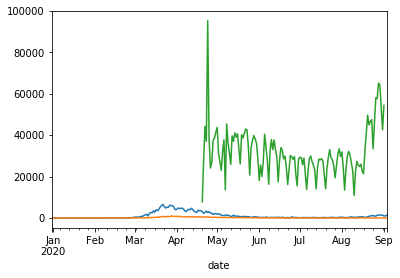

In [60]:
results_df.new_cases.plot()
results_df.new_deaths.plot()
results_df.new_tests.plot();

In [63]:
death_rate=results_df.Total_deaths/results_df.Total_cases

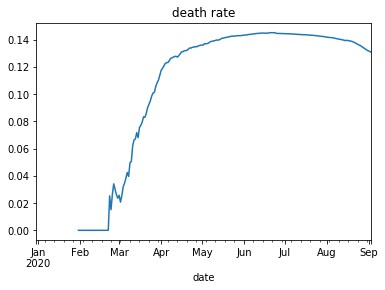

In [66]:
death_rate.plot(title='death rate',kind='line')

In [67]:
positive_rate=results_df.Total_cases/results_df.Total_tests

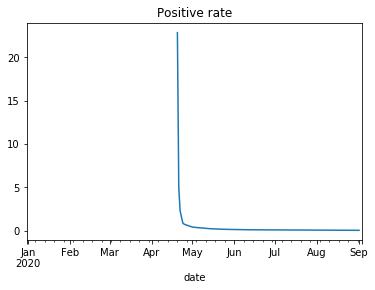

In [69]:
positive_rate.plot(title='Positive rate',kind='line')